# Get the materials
If you followed one of the setup workbooks you should have confirmed you have Git or installed it and created a Github account. Based on those assumptions, we'll go ahead and download the lesson materials.

## Navigate to the project
We can find all the materials at https://github.com/branhoff/python_class_101. Once there, you'll want to "fork" them. Let's go over forking really quick.

## Forking a project
Forking is a process in Github/Gitlab where you create a copy of a repository under your own account. This allows you to make changes to the code without affecting the original repository. 

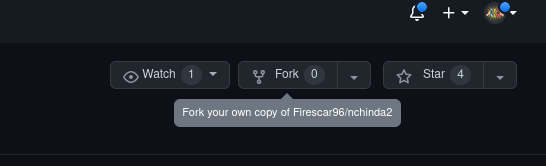

Once we've forked the project we'll move on to "cloning" it locally.

## Cloning a project
Cloning is the process of copying a repository from a remote source, such as Github, to your local machine. It creates a local copy of the repository, including all its files and history, that you can use to work on the code and track your changes. This allows you to make changes to the code and keep the local repository in sync with the remote repository by *pushing* (downloading changes made to a remote repository) and *pulling* (uploading changes made to a local repository to a remote one) the *commits* (a snapshot of the changes made to a project's codebase at a specific point in time).

Let's first setup a place on our machines where we'll store our local copy of the project. Open up your terminal and navigate to the "home" directory with the change directory command, `cd` and the home directory symbol, `~`. The `~` symbol is shorthand for the full path `/Users/<username>` (mac), `/home/<username>` (linux), or `C:\Users\<username>` (windows) depending on your operating system.

On a Mac the sequence of commands would look like: 
```bash
➜ cd ~
➜ pwd
/Users/TNguyen
```

Let's create  directory to store our projects. By convention I use something like `GitProjects` where I store all of my cloned remote reposotories. You can naturally call it anything you like. We can make a directory at our current location in the terminal with the command `mkdir GitProjects`. If we list our directoreis out with the command `ls` we should see it now.

```bash
➜ cd ~ # should be in home already, but if not cd in there
➜ mkdir GitProjects
➜ ls 
Desktop  Documents  Downloads  GitProjects  Music  Pictures  Public  Videos
```

Let's `cd` into our newly created directory so we can easily clone our forked project where we want it.

```bash
➜ cd GitProjects
➜ pwd
➜ /Users/TNguyen/GitProjects # remember your equivalent home (~) might be a bit different depending on your OS
```

If we go back to GitHub and select the green `<> Code` button, we'll see some options for cloning. The two options we'll discuss are `HTTPS` and `SSH`. Let's briefly talk about the pros and cons of these two options.

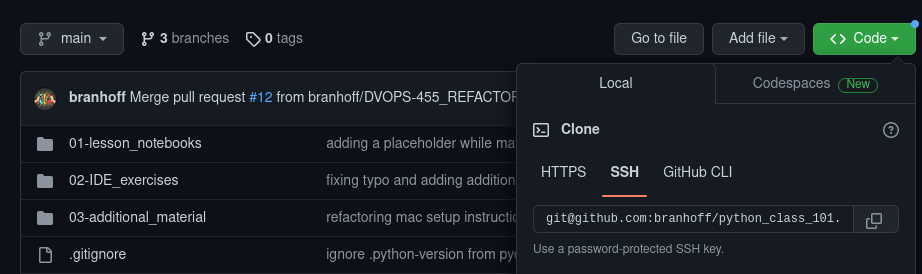

## HTTPS vs SSH
Cloning a repository in Github can be done either using HTTPS (Hypertext Transfer Protocol Secure) or SSH (Secure Shell) protocol.

HTTPS cloning is the most common method and it uses your Github username and password to authenticate with the remote repository. This protocol is convenient and easy to use, but it requires you to enter your credentials each time you clone or push changes to the repository.

SSH cloning, on the other hand, uses a secure key-based authentication system instead of a password. To use SSH cloning, you need to generate a SSH key pair, add the public key to your Github account, and then use the private key to authenticate with the remote repository. This method is more secure than HTTPS cloning as it does not require you to enter your credentials every time, and your private key is kept on your local machine.

We prefer SSH cloning though it requires a bit more setup. Seeing as one of this course's core philosophies is not hiding or obscuring the configuration challenges developer s face, let's forge ahead with setting up SSH keys.

## Setting up SSH keys
The default and common place to store SSH keys is in your `.ssh` directory that should be located in your home (`~`) directory. We can check if it's there a couple of ways. The common/easy way is to `cd` to your home directory and call the command `ls -la`. Alternatively, you can call `ls -la ~` to execute the same command on a specific directory, rather than the default current directory. We are familiar with `ls` but what's with the `-la` component? Well here's a quick break down of the commands:

- `ls` is the command for listing the contents of a directory.
- `-l` is an option that displays the output in a long format, showing detailed information about each file and directory, including permissions, owner, size, and modification time.
- `-a` is an option that displays all files, including hidden files and directories, which are denoted by a dot (`.`) at the beginning of their names.

When we run this, we should see if the `.ssh` directory is listed out from our `~` directory.

We could also be a bit more precise and use the `find` command like so:
```bash
find ~ -name .ssh -type d

```
Here's a quick breadown of the commponents of this command:
- `find` is the command for searching for files and directories in a directory hierarchy.
- `~` specifies the home directory for the search. We could specify an actual directory path, or something like the `.` command for the current directory.
- `-name` specifies the name of the file or directory to search for. In this case, we are looking for a hidden directory called `.ssh`.
- `-type d` specifies that we are searching for directories only.

If the `.ssh` directory exists we should see it returned in either of these commands.

### Creating the `.ssh` directory
Let's run the command `mkdir ~/.ssh` to create the directory called `.ssh` in our home directory.

Let's also set some restricted permissions to ensure the security of the keys that we'll be creating. Let's run the following command:
```bash
chmod 700 ~/.ssh
```
The `chmod 700` sets the permissions of the `.ssh` directory to be readable, writable, and executable only by the owner of the diectory.

### Creating SSH keys
GitHub has great [documentation](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account) for how to create keys and connect to GitHub.
If we already have a `.ssh` directory (and it's not freshly created), we should check for existing keys.
```
ls -la ~/.ssh
```
If you haven't specifically created GitHub keys (and presumably forgotten), let's generate new ssh keys with teh `ssh-keygen` command:
```
ssh-keygen -t ed25519 -C "your_github_email@example.com" -f ~/.ssh/id_ed25519_github
```
Let's breadkown the components of the command so we're not just mindlessly following instructions:
- `ssh-keygen` is a command-line utility for generating SSH key pairs.
- `-t ed25519` specifies the type of key pair to generate. In this case, we are generating a key pair using the Ed25519 algorithm, which is a newer and more secure algorithm than the previously popular RSA algorithm.
- `-C "your_github_email@example.com"` specifies a comment that will be included in the generated key file. The comment is typically used to identify the key or to provide additional information about its purpose. In this case, we are using the email address associated with the GitHub account, which can help to identify the key later on.
- `-f ~/.ssh/id_ed25519_github` specifies the file name and path of the generated key pair. In this case, we arerere specifying a custom file name and path for the key pair, which allows us to save the keys in a specific location and with a specific name. In our opinion, ideally, SSH keys should have a singular purpose so as not to expose security risks if our private key were ever discovered or accidentally made public. So we'll naturally name this key something realted to GitHub so we con't confuse ourselves later.

When prompted for a passphrase, that will be up to you. Generally, we leave this blank. Naturally, it would be more secure to require a password, but we don't want to enter one every time we push and pull from Github... We'll leave that to you to decide.

If we `ls` out our `.ssh` directory we should see our keys:
```bash
➜ ls ~/.ssh
id_ed25519_github  id_ed25519_github.pub  known_hosts  known_hosts.old

```

### Storing your Public SSH keys in GitHub
Once again, we'll point you to GitHub's [documentation](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account) as the source of turth for copying your public keys in GitHub.

We'll briefly describe the process.

Now that we've created our keys (as we saw above), we can now provide the contents of the file we created with the `.pub` (public) extension to GitHub.

We can copy it to our clipboard with some command line tools, but which command line tools you have often varies from system to system. You can investigate this [Stack Overflow question](https://stackoverflow.com/questions/16638092/copying-a-rsa-public-key-to-clipboard) for some suggestions (potentially).

However, much easier than this, if you followed our setup instructions, we can also manually copy the file with VS code commands. Just call the command:
```bash
code ~/.ssh/id_ed25519_github.pub
```
You can then manually copy it into the settings page that GitHub provided in their [documentation](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account).

## Cloning (for real this time)
Now that we've done ALL that, we can clone via SSH. Navigate back to your forked repository of the material. Then click the `<> Code` button and select the SSH option and copy teh given command (note that it will default to HTTPS so be sure you selected SSH or all our hard work will be wasted!).

You should have a command that looks more or less like this:
```
git@github.com:<username>/python_class_101.git
```
In our terminal let's make sure we've navigated to our `GitProjects` directory we created. Once there we can clone it with the command given command.

When we `ls` we should see the directory `python_class_101` has been created. Let's open it at its root with VS code by calling `code python_class_101`. At this point we should see all the resources we can normally see on GitHub in our VS Code. Nice!

## Getting VS Code add-ons
The lesson materials are written in Jupyter Notebooks. We can read them via the browser, but it's also nice to be able to read and update them from VS Code itself.
You can search for necessary extensions in the `Extension` tab. We'll want the [Jupyter](https://open-vsx.org/extension/ms-toolsai/jupyter) and the [Python](https://open-vsx.org/extension/ms-python/python) extensions. Once we have these and perform any required restarts, we should be able to read and edit our workbooks directly from VS Code.

### Jupyter
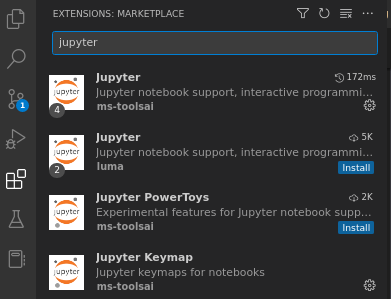

### Python
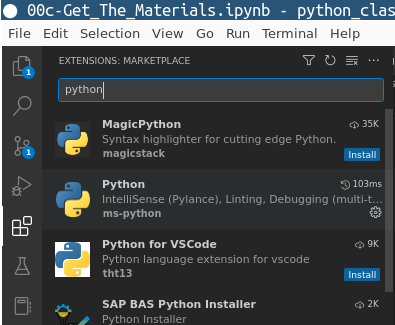

You'll need to make sure that you Python interpreter is properly set, likely VS Code will prompt you for that, but if you find that you can't run any code, follow VS Code's [setup instructions](https://code.visualstudio.com/docs/python/python-tutorial).
